# HR Department Leave

This project we are exploring the data of employees of a company given to us by their Human Resources Deparment, our Job is to identify the patterns of this data and predict given some certainn conditions if an employee would leave or stay in the company

### Features
* Satisfaction_level
* Last_evaluation
* Number_project
* Average_montly_hours
* Time_spend_company
* Work_accident
* Promotion_last_5years
* Department
* Salary

### Target
* Left

### Import Starter Libraries 

In [38]:
#Starter Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("prism")

* Explore dataset
* EDA
* Data Cleaning and Feature Enginerring
* Test and Train Split
* Model Training
* Model Evaluation and Performance

### Exploratory Data Analysis

In [39]:
hr = pd.read_csv("HR_comma_sep.csv")

In [40]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Okay, this dataset probably has a really Good Data entry personnel or it's fake, but  since we are seeing this from a real world problem view, we'll assume that they have a good data entry personnel

Probably should be entering the data for all my projects...😂😂

In [41]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Wow, someone actually has a satisfaction level of 9%, must be tough

In [42]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
#How many people left the company?

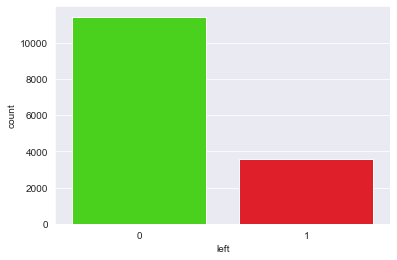

In [44]:
sns.countplot(x=hr["left"]);

In [45]:
quit_job = sum(hr["left"] == 1)
print(f"{quit_job} people left the company")

3571 people left the company


In [46]:
# What percentage of people left the company
#Notes - Converting int to 2 decimal places

In [47]:
total_employees = len(hr["left"])
quit_rate = (quit_job / total_employees) * 100

print(f"{quit_rate}% of employees left the company")

23.80825388359224% of employees left the company


What are the ratings of the employee's satisfaction level

* Excellent - 70%
* Really Good - 60%
* Good - 50%
* Poor - 40%
* Bad - Less than 40%

Let us define a function that would map each of the Satisficationary levels to the criteria we stated above

In [48]:
def rating(serie):
    ratings = {}
    for a in serie:
        if a >= 0.7:
            ratings[a] = "Excellent"
        elif (a >= 0.6) and (a < 0.7):
            ratings[a] = "Very Good"
        elif (a >= 0.5) and (a < 0.6):
            ratings[a] = "Average"
        elif (a >= 0.4) and (a < 0.5):
            ratings[a] = "Poor"
        else:
            ratings[a] = "Bad"
    return ratings

In [49]:
ratings = rating(hr["satisfaction_level"])
hr["ratings"] = hr["satisfaction_level"].map(ratings)

A lot of people actually rated their comfort at the company well

In [50]:
hr["ratings"].value_counts(normalize=True)*100

Excellent    43.356224
Bad          19.434629
Very Good    13.067538
Average      13.020868
Poor         11.120741
Name: ratings, dtype: float64

So from the plot below, most people that left had either reviewed a poor or bad rating, which we must have expected. 

But what's shocking is that the third highest group gave a review of Excelent, 

This may be probably because they moved out of the city or quite based on personal interests that may not have been influenced by the company e.g. the service of the company may have been good to them, but they didnt have passion for the job they were working on e.t.c

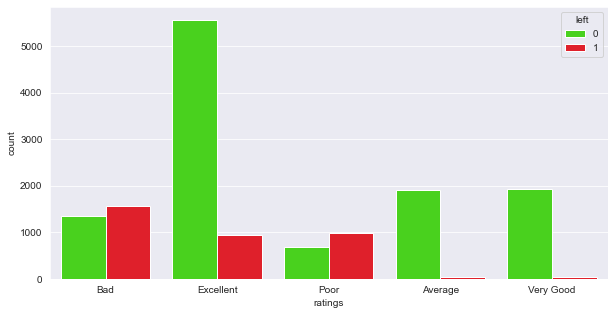

In [51]:
plt.figure(figsize=[10, 5])
sns.countplot(x=hr["ratings"], hue=hr["left"]);

Let's check the most populated departments

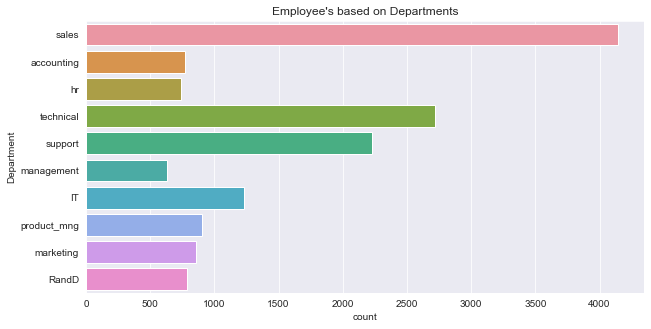

In [52]:
plt.figure(figsize=[10,5])

plt.title("Employee's based on Departments")

sns.countplot(y=hr["Department"]);

Frrom the graph below it seems most people left from Sales, Technical and Support department respectively

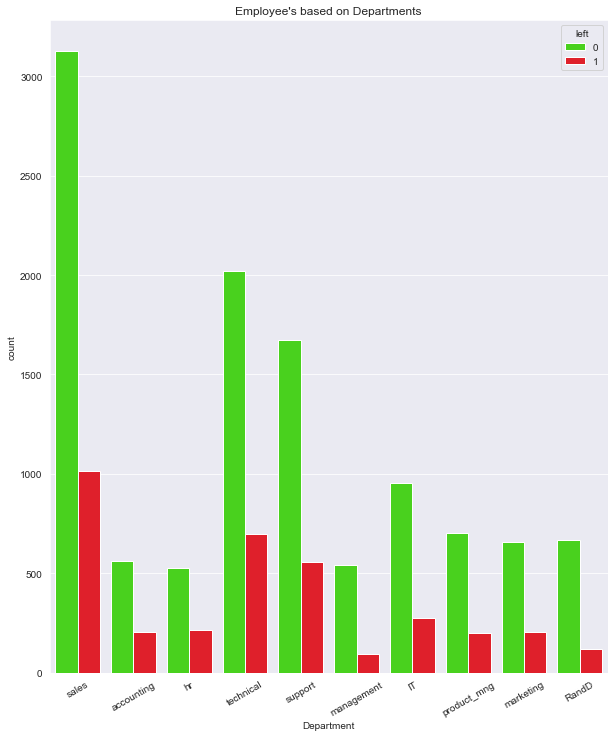

In [53]:
plt.figure(figsize=[10,12])

plt.title("Employee's based on Departments")

# Rotate value on X axis
plt.xticks(rotation=30)

sns.countplot(x=hr["Department"], hue=hr["left"]);

It also seems that most people that quit had monthly work hours greater than 200 hours and also around 150 hours of work

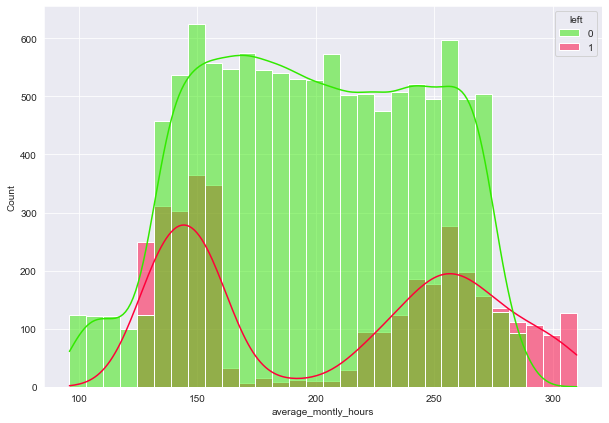

In [54]:
plt.figure(figsize=[10,7])

sns.histplot(x=hr["average_montly_hours"], hue=hr["left"], palette="prism", kde=True);

Work accident seems to bring no information about why some employees left

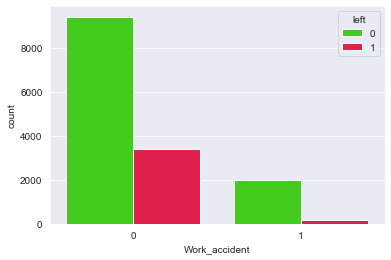

In [55]:
sns.countplot(x=hr["Work_accident"], hue=hr["left"], palette="prism");

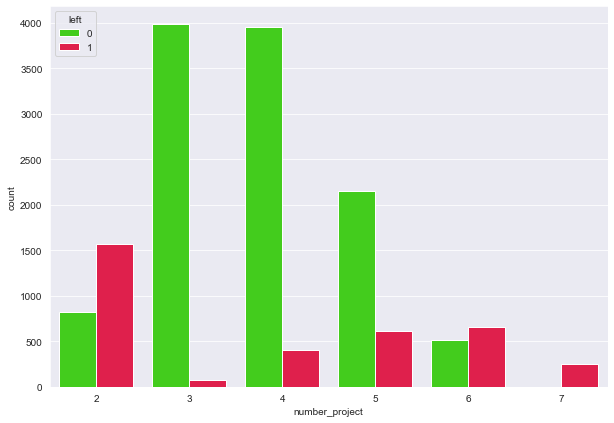

In [56]:
plt.figure(figsize=[10,7])
sns.countplot(x=hr["number_project"], hue=hr["left"], palette="prism");

It seems people who didnt get a promotion within 5 years left while people who got one all stayed

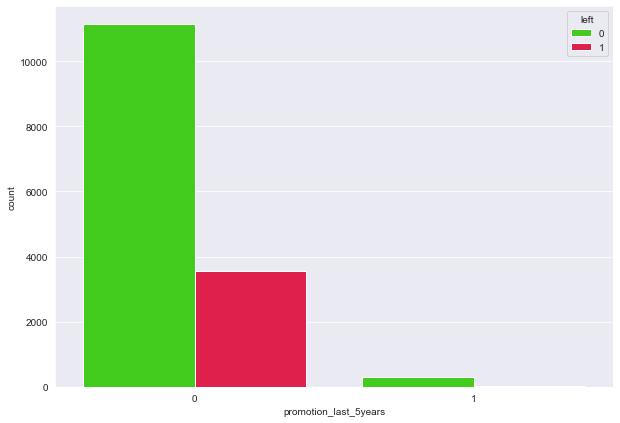

In [57]:
plt.figure(figsize=[10,7])
sns.countplot(x=hr["promotion_last_5years"], hue=hr["left"], palette="prism");

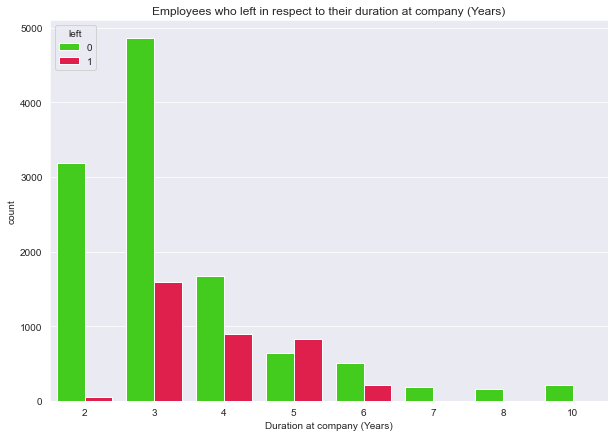

In [58]:
plt.figure(figsize=[10,7])

plt.title("Employees who left in respect to their duration at company (Years)")

sns.countplot(x=hr["time_spend_company"], hue=hr["left"], palette="prism")

plt.xlabel("Duration at company (Years)");

The people who left the company the most had low grades of salary, which is actually what I most suspected

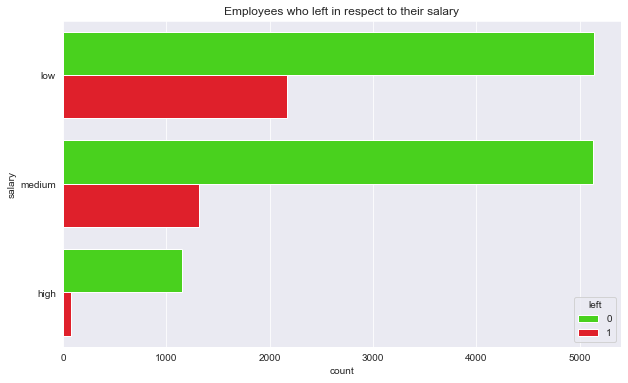

In [59]:
plt.figure(figsize=[10, 6])

plt.title("Employees who left in respect to their salary")

sns.countplot(y=hr["salary"], hue=hr["left"]);

### Model Training

Okay let us get to a more interesting part of our project predicting if an employee would stay or leave based on our features

In [60]:
#Mapping sales
salary_code = {"low" : 1, "medium": 2, "high": 3}
hr["salary_code"] = hr["salary"].map(salary_code)

In [61]:
# # Reduced accuracy to 79% from 80% using salary mapping

# # # Transforming Norminal Categorical Values
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder()
# enc.fit(hr[['Department']])
# enc.categories_

In [62]:
# one_hot = enc.transform(hr[['Department']]).toarray()
# hr[['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
#         'product_mng', 'sales', 'support', 'technical']] = one_hot

#### Train and Test Split

we would use 70/30 train-test

In [63]:
X = hr.drop(["Department","salary","ratings", "left"], axis=1)
y = hr["left"]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier()

In [68]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
predictions = model.predict(X_test)

In [70]:
compare_df = pd.DataFrame(
    {
        "Target" : y_test,
        "Prediction" : predictions
    }
)

In [71]:
compare_df.sample(10)

,Target,Prediction
6978,0,0
13665,0,0
9147,0,0
9491,0,0
6327,0,0
10641,0,0
3431,0,0
14022,0,0
2270,0,0
7852,0,0


###  Model Evaluation and Performance

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3428
           1       0.95      0.97      0.96      1072

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



<AxesSubplot:>

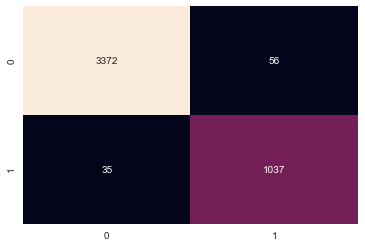

In [74]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, fmt="d")